## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")



In [6]:
combined_df
writer = pd.ExcelWriter('new_pdf.xlsx')
combined_df.to_excel(writer,'Sheet1')
writer.save()
writer.close()

In [7]:
# Checking the number of mice in the DataFrame.
count_of_mice = combined_df["Mouse ID"].nunique()
count_of_mice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find a duplicate rows
duplicateDFRow = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicateDFRow)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_df_dup = combined_df.loc[combined_df["Mouse ID"] == 'g989']
combined_df_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df.loc[combined_df["Mouse ID"] != 'g989']

clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.

new_count_of_mice = clean_combined_df["Mouse ID"].nunique()
new_count_of_mice

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean,median,variance,standard deviation,
# and SEM of the tumor volume for each regimen

clean_df_grp = clean_combined_df.groupby(["Drug Regimen"])

tumor_volume_mean = clean_df_grp.mean()["Tumor Volume (mm3)"]

tumor_volume_median = clean_df_grp.median()["Tumor Volume (mm3)"]

tumor_volume_variance = clean_df_grp.var()["Tumor Volume (mm3)"]
 
tumor_volume_sd = clean_df_grp.std()["Tumor Volume (mm3)"]

tumor_volume_sem = clean_df_grp.sem()["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series and putting them all together at the end.
clean_df_summary = pd.DataFrame(clean_combined_df.groupby(["Drug Regimen"]).count())
clean_df_summary["Tumor Volume Mean"]= tumor_volume_mean
clean_df_summary["Tumor Volume Median"]= tumor_volume_median
clean_df_summary["Tumor Volume Variance"] = tumor_volume_variance
clean_df_summary["Tumor Volume Standard Deviation"] = tumor_volume_sd
clean_df_summary["Tumor Volume SEM"] = tumor_volume_sem
clean_df_summary = clean_df_summary.drop(columns=["Mouse ID", "Sex","Age_months", "Weight (g)",
                                                  "Timepoint","Tumor Volume (mm3)","Metastatic Sites"])

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df_summary.head()

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots

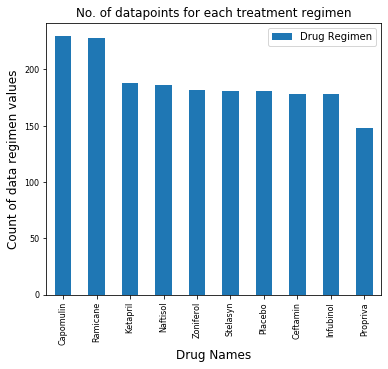

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

plt.figure()
plt1 = clean_combined_df['Drug Regimen'].value_counts().plot(kind='bar',title ="No. of datapoints for each treatment regimen"
                                                      ,figsize=(6,5),legend=True, fontsize=8)
plt1.set_xlabel("Drug Names",fontsize=12)
plt1.set_ylabel("Count of data regimen values",fontsize=12)
plt.show()


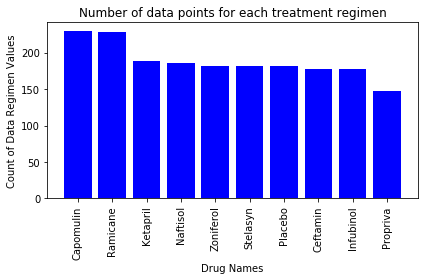

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

regimen_counts = clean_combined_df['Drug Regimen'].value_counts()
treatment_names = regimen_counts.keys()
plt.figure()
plt.bar(treatment_names, regimen_counts, color="blue" )
plt.xticks(rotation="vertical")
plt.xlabel("Drug Names")
plt.ylabel("Count of Data Regimen Values")
plt.title("Number of data points for each treatment regimen")
plt.tight_layout()
plt.show()

## Pie Plots

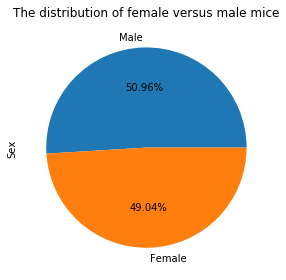

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure()
clean_combined_df['Sex'].value_counts().plot(kind='pie',autopct="%1.2f%%");
plt.title("The distribution of female versus male mice")
plt.tight_layout()
plt.show()


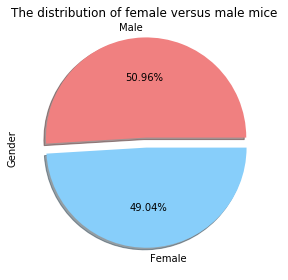

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure()
Gender_count = clean_combined_df['Sex'].value_counts()
Gender_names = Gender_count.keys()
colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0)

plt.pie(Gender_count, explode=explode, labels=Gender_names, colors=colors,
        autopct="%1.2f%%", shadow=True)
plt.ylabel("Gender")
plt.title("The distribution of female versus male mice ")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 

clean_combined_df_new = clean_combined_df.loc[(clean_combined_df["Drug Regimen"] == "Capomulin") | 
                                              (clean_combined_df["Drug Regimen"] == "Ramicane") |
                                              (clean_combined_df["Drug Regimen"] == "Infubinol") |
                                              (clean_combined_df["Drug Regimen"] == "Ceftamin")]

clean_combined_df_new.reset_index()
promising_trt_df = clean_combined_df_new.groupby(['Mouse ID']).nth(-1)
#promising_trt_df = clean_combined_df_new[idx]

promising_trt_df.sort_values(by=['Mouse ID'])

#Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_volume_d1 = promising_trt_df[promising_trt_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
tumor_volume_d2 = promising_trt_df[promising_trt_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
tumor_volume_d3 = promising_trt_df[promising_trt_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
tumor_volume_d4 = promising_trt_df[promising_trt_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
promising_trt_df.head(20)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0
a520,Ramicane,Male,13,21,45,38.810366,1
a577,Infubinol,Female,6,25,30,57.031862,2
a644,Ramicane,Female,7,17,45,32.978522,1
a685,Infubinol,Male,8,30,45,66.083066,3


In [22]:
# Quartile calculations: Capomulin
quartiles = tumor_volume_d1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin final tumor volume is: {lowerq}")
print(f"The upper quartile of Capomulin final tumor volume is: {upperq}")
print(f"The interquartile range of Capomulin  final tumor volume is: {iqr}")
print(f"The the median of Capomulin final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin final tumor volume values below {lower_bound} could be outliers.")
print(f"Capomulin final tumor volume values above {upper_bound} could be outliers.")

The lower quartile of Capomulin final tumor volume is: 32.37735684
The upper quartile of Capomulin final tumor volume is: 40.1592203
The interquartile range of Capomulin  final tumor volume is: 7.781863460000004
The the median of Capomulin final tumor volume is: 38.125164399999996 
Capomulin final tumor volume values below 20.70456164999999 could be outliers.
Capomulin final tumor volume values above 51.83201549 could be outliers.


In [23]:
# Quartile calculations: Ramicane
quartiles = tumor_volume_d2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane final tumor volume is: {lowerq}")
print(f"The upper quartile of Ramicane final tumor volume is: {upperq}")
print(f"The interquartile range of Ramicane  final tumor volume is: {iqr}")
print(f"The the median of Ramicane final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane final tumor volume values below {lower_bound} could be outliers.")
print(f"Ramicane final tumor volume values above {upper_bound} could be outliers.")

The lower quartile of Ramicane final tumor volume is: 31.56046955
The upper quartile of Ramicane final tumor volume is: 40.65900627
The interquartile range of Ramicane  final tumor volume is: 9.098536719999998
The the median of Ramicane final tumor volume is: 36.56165229 
Ramicane final tumor volume values below 17.912664470000003 could be outliers.
Ramicane final tumor volume values above 54.30681135 could be outliers.


In [24]:
# Quartile calculations: Infubinol
quartiles = tumor_volume_d3.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol final tumor volume is: {lowerq}")
print(f"The upper quartile of Infubinol final tumor volume is: {upperq}")
print(f"The interquartile range of Infubinol  final tumor volume is: {iqr}")
print(f"The the median of Infubinol final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol final tumor volume values below {lower_bound} could be outliers.")
print(f"Infubinol final tumor volume values above {upper_bound} could be outliers.")

The lower quartile of Infubinol final tumor volume is: 54.04860769
The upper quartile of Infubinol final tumor volume is: 65.52574285
The interquartile range of Infubinol  final tumor volume is: 11.477135160000003
The the median of Infubinol final tumor volume is: 60.16518046 
Infubinol final tumor volume values below 36.83290494999999 could be outliers.
Infubinol final tumor volume values above 82.74144559000001 could be outliers.


In [25]:
# Quartile calculations: Ceftamin
quartiles = tumor_volume_d4.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin final tumor volume is: {lowerq}")
print(f"The upper quartile of Ceftamin final tumor volume is: {upperq}")
print(f"The interquartile range of Ceftamin  final tumor volume is: {iqr}")
print(f"The the median of Ceftamin final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin final tumor volume values below {lower_bound} could be outliers.")
print(f"Ceftamin final tumor volume values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin final tumor volume is: 48.72207785
The upper quartile of Ceftamin final tumor volume is: 64.29983003
The interquartile range of Ceftamin  final tumor volume is: 15.577752179999997
The the median of Ceftamin final tumor volume is: 59.85195552 
Ceftamin final tumor volume values below 25.355449580000002 could be outliers.
Ceftamin final tumor volume values above 87.66645829999999 could be outliers.


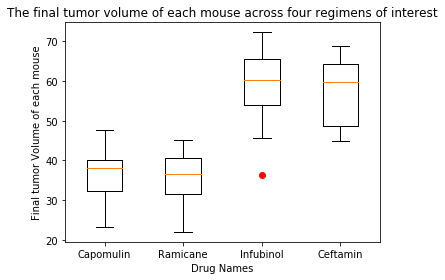

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure()
plt.boxplot([tumor_volume_d1,tumor_volume_d2,tumor_volume_d3,tumor_volume_d4],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],sym='ro')
plt.xlabel("Drug Names")
plt.ylabel("Final tumor Volume of each mouse")
plt.title("The final tumor volume of each mouse across four regimens of interest")
plt.tight_layout()
plt.show()

## Line and Scatter Plots

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

sample_mouseid = clean_combined_df[clean_combined_df["Drug Regimen"]=="Capomulin"].sample()["Mouse ID"]
print(sample_mouseid)

291    b742
Name: Mouse ID, dtype: object


<Figure size 432x288 with 0 Axes>

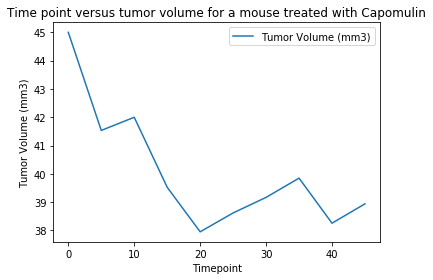

In [35]:

Capomulin_df = clean_combined_df[(clean_combined_df["Mouse ID"]== 'b742') & (clean_combined_df["Drug Regimen"]=="Capomulin")]
Capomulin_df

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.figure()
Capomulin_df.plot(x='Timepoint', y='Tumor Volume (mm3)')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Time point versus tumor volume for a mouse treated with Capomulin")
plt.tight_layout()
plt.show()

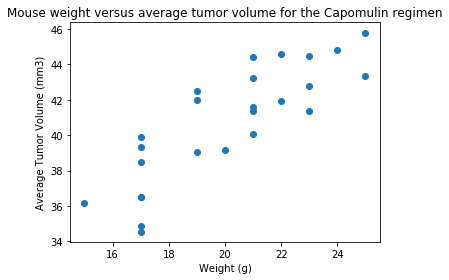

In [148]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = clean_combined_df[clean_combined_df["Drug Regimen"]=="Capomulin"]

Avg = cap_df.groupby(["Mouse ID", "Weight (g)"]).mean()["Tumor Volume (mm3)"]
sp_df = pd.DataFrame(Avg)
sp_df.reset_index(inplace=True)
plt.figure()
plt.scatter(sp_df["Weight (g)"],sp_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")
plt.tight_layout()
plt.show()

## Correlation and Regression

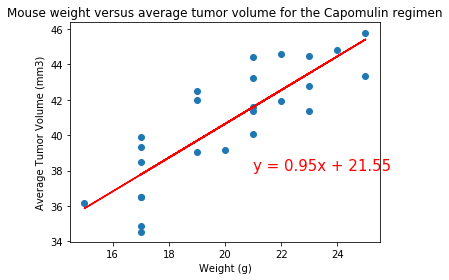

In [152]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = sp_df["Weight (g)"]
y_values = sp_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure()
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,38),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")
plt.tight_layout()
plt.show()